# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import os
import json
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
#read the twitter archive data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#assign the url to a variable
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 

#access the content of the url and assign it to a variable
response = requests.get(url)

In [4]:
#write the content to a file
with open(url.split('/')[-1], 'wb') as file:
    file.write(response.content)

In [3]:
#read the file and assign it to images
images = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
api_key = 'hidden' 
api_key_secret = 'hidden' 
access_token = 'hidden' 
access_token_secret = 'hidden' 

In [7]:
#set the api and access key to grant access to twitter data

auth = tweepy.OAuthHandler(api_key, api_key_secret)

auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [8]:
#create a list to hold tweet_ids with missing tweets
deleted_tweets = []

#set iterartor counter
count = 0

#put all tweet_ids in a list
tweet_ids = twitter_archive.tweet_id.tolist()

#query twitter data using tweet_id and write the content to a .txt file using json.dump()
with open('tweet_json.txt', 'w') as f:
    for tweet_id in tweet_ids:
        count +=1
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except Exception as error:
            print(str(count) + "-" + str(tweet_id) + "-" + str(error))
            deleted_tweets.append(tweet_id)
print('Finished!')

20-888202515573088257-[{'code': 144, 'message': 'No status found with that ID.'}]
96-873697596434513921-[{'code': 144, 'message': 'No status found with that ID.'}]
102-872668790621863937-[{'code': 144, 'message': 'No status found with that ID.'}]
105-872261713294495745-[{'code': 144, 'message': 'No status found with that ID.'}]
119-869988702071779329-[{'code': 144, 'message': 'No status found with that ID.'}]
133-866816280283807744-[{'code': 144, 'message': 'No status found with that ID.'}]
156-861769973181624320-[{'code': 144, 'message': 'No status found with that ID.'}]
183-856602993587888130-[{'code': 144, 'message': 'No status found with that ID.'}]
186-856330835276025856-[{'code': 34, 'message': 'Sorry, that page does not exist.'}]
212-851953902622658560-[{'code': 144, 'message': 'No status found with that ID.'}]
213-851861385021730816-[{'code': 144, 'message': 'No status found with that ID.'}]
248-845459076796616705-[{'code': 144, 'message': 'No status found with that ID.'}]
254-

In [9]:
#create an empty list to store extracted data from .txt file
api_data = []
#read the .txt line by line and extract needed data
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        line_json = json.loads(line)
        id = line_json['id']
        fav_count = line_json['favorite_count']
        retweet = line_json['retweet_count']
        api_data.append({'tweet_id':id, 
                         'favorite_count':fav_count, 
                         'retweet_count':retweet})

In [10]:
#convert dictionary from above to dataframe
df = pd.DataFrame(api_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [11]:
#save dataframe to .csv file
df.to_csv('twitter_api_data.csv', index = False)

In [4]:
#read .csv file and assign to api_data
api_data = pd.read_csv('twitter_api_data.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
api_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7010,33829
1,892177421306343426,5302,29340
2,891815181378084864,3482,22070
3,891689557279858688,7228,36953
4,891327558926688256,7765,35324
5,891087950875897856,2602,17815
6,890971913173991426,1666,10369
7,890729181411237888,15761,56889
8,890609185150312448,3624,24531
9,890240255349198849,6101,27971


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
twitter_archive[twitter_archive['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [18]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
twitter_archive[twitter_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [20]:
twitter_archive[twitter_archive['rating_numerator'] > twitter_archive['rating_numerator'].mean()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None


In [21]:
twitter_archive.duplicated().sum()

0

In [22]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [25]:
api_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2472.343361,7057.790288
std,6.820795e+16,4186.951953,10967.428547
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.000000,1226.000000
50%,7.178418e+17,1149.000000,3053.000000
75%,7.986547e+17,2863.000000,8611.000000
max,8.924206e+17,70784.000000,144952.000000


### Quality issues
1. twitter_archive: in_reply_to_status_id and in_reply_to_user_id columns have 78 values. Also, there are 181 values in the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. These are not original ratings.

2. twitter_archive: Ratings with decimal values incorrectly extracted 

3. twitter_archive: datatypes of tweet_id, timestamp, rating_numerator and rating_denominator incorrect.

4. twitter_archive: rating_numerator contains ratings that aren't valid (in the actual tweet, these aren't the real ratings, and some have no ratings).

5. twitter_archive: Some dog names in the name column are invalid. They have a pattern of starting with small letters.

6. images: There are 3 predictions in this table. Just one with the highest confidence and a true dog prediction is enough. Also, the values aren't consistent with case type.

7. images: The predictions and jpg_url columns are redundant.

8. images: tweet_id, img_num should be string datatype not int.

### Tidiness issues
1. twitter_archive: floofer, doggo, pupper and puppo should be in a column. These are values presented as variables.
2. The 3 datsets should be in just a single dataset not separated since they all have a common column (tweet_id)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [5]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
images_clean = images.copy()
api_data_clean = api_data.copy()

### Issue #1: 
twitter_archive: in_reply_to_status_id and in_reply_to_user_id columns have 78 values. Also, there are 181 values in the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp. These are not original ratings.

#### Define
-- drop rows that do not have null values in these columns. Then, remove these columns.

#### Code

In [6]:
unreal_ratings = twitter_archive_clean[(twitter_archive_clean['in_reply_to_status_id'].notnull()) & (twitter_archive_clean['in_reply_to_user_id'].notnull())]
twitter_archive_clean.drop(unreal_ratings.index, inplace=True)

In [7]:
unreal_ratings_2 = twitter_archive_clean[(twitter_archive_clean['retweeted_status_id'].notnull()) & (twitter_archive_clean['retweeted_status_user_id'].notnull()) & (twitter_archive_clean['retweeted_status_timestamp'].notnull())]
twitter_archive_clean.drop(unreal_ratings_2.index, inplace=True)

In [8]:
columns_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean.drop(columns = columns_to_drop, inplace=True)

#### Test

In [9]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #2
twitter_archive: Ratings with decimal values incorrectly extracted 

#### Define
-- Extract the correct rating numerators from the text column values using regular expression that matches and includes decimal values. 

#### Code

In [9]:
ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
twitter_archive_clean.rating_numerator = ratings[0]

#### Test

In [10]:
twitter_archive_clean.rating_numerator.value_counts()

12       486
10       436
11       413
13       287
9        153
8         98
7         52
14        38
5         33
6         32
3         19
4         16
2          9
1          5
50         1
420        1
13.5       1
11.27      1
1776       1
80         1
144        1
84         1
24         1
121        1
204        1
99         1
11.26      1
60         1
165        1
9.75       1
0          1
44         1
88         1
45         1
Name: rating_numerator, dtype: int64

### Issue #3
twitter_archive: datatypes of tweet_id, timestamp, rating_numerator and rating_denominator incorrect.

#### Define
-- Change datatypes to valid ones.

#### Code

In [11]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(float)

#### Test

In [12]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 213.0+ KB


### Issue #4
twitter_archive: rating_numerator contains ratings that aren't valid (in the actual tweet, these aren't the real ratings, and some have no ratings).

#### Define
-- For rows where the ratings are invalid, replace the invalid ratings with the valid ones. Then, remove rows where there are no ratings (we want only rows that have ratings).

#### Code

In [13]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '810984652412424192', ['rating_numerator']] = '' 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '810984652412424192', ['rating_denominator']] = '' 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '670842764863651840', ['rating_numerator']] = '' 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '670842764863651840', ['rating_denominator']] = '' 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '740373189193256964', ['rating_numerator']] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '740373189193256964', ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '722974582966214656', ['rating_numerator']] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '722974582966214656', ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '716439118184652801', ['rating_numerator']] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '716439118184652801', ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '682962037429899265', ['rating_numerator']] = 10 
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '682962037429899265', ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '666287406224695296', ['rating_numerator']] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '666287406224695296', ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '740373189193256964', ['rating_numerator']] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '740373189193256964', ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '722974582966214656', ['rating_numerator']] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '722974582966214656', ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '666287406224695296', ['rating_numerator']] = 9
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '666287406224695296', ['rating_denominator']] = 10

In [14]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator == ''].index, inplace = True)

In [15]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

#### Test

In [16]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      486
10.00      437
11.00      414
13.00      288
9.00       153
8.00        98
7.00        51
14.00       39
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
84.00        1
13.50        1
0.00         1
1776.00      1
165.00       1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
80.00        1
Name: rating_numerator, dtype: int64

### Issue #5
twitter_archive: Some dog names in the name column are invalid. They have a pattern of starting with small letters.

#### Define
-- Replace the invalid dog names with 'None'.

#### Code

In [17]:
mask = twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
twitter_archive_clean[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [18]:
twitter_archive_clean.name = twitter_archive_clean.name.apply(lambda x: 'None' if x[0].islower() else x)

#### Test

In [19]:
twitter_archive_clean[mask].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

### Issue #6
images: There are 3 predictions in this table. Just one with the highest confidence and a true dog prediction is enough. Also, the values aren't consistent with case type.

#### Define
-- create a new column to extract dog_breed with a true value and highest confidence. Convert the values to be in title case.

#### Code

In [20]:
def dog_breed(images_clean):
    if images_clean.p1_dog == True:
        return images_clean.p1
    elif images_clean.p2_dog == True:
        return images_clean.p2
    elif images_clean.p3_dog == True:
        return images_clean.p3
    else:
        return 'None'

In [21]:
images_clean['dog_breed'] = images_clean.apply(dog_breed, axis=1)

In [22]:
images_clean.dog_breed = images_clean.dog_breed.str.title()

#### Test

In [23]:
images_clean.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
1371,762316489655476224,https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg,1,African_grey,0.270468,False,Madagascar_cat,0.076187,False,television,0.033306,False,None
995,708149363256774660,https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg,1,Cardigan,0.350993,True,basset,0.164555,True,toy_terrier,0.080484,True,Cardigan
1277,750086836815486976,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,1,pug,0.978277,True,teddy,0.003134,False,Brabancon_griffon,0.003061,True,Pug
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False,French_Bulldog
437,674416750885273600,https://pbs.twimg.com/media/CVwCdCFW4AUHY4D.jpg,1,Chihuahua,0.287201,True,Boston_bull,0.250920,True,whippet,0.141012,True,Chihuahua
890,699323444782047232,https://pbs.twimg.com/media/CbR-9edXIAEHJKi.jpg,1,Labrador_retriever,0.309696,True,doormat,0.303700,False,sliding_door,0.077266,False,Labrador_Retriever
419,674038233588723717,https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg,1,Eskimo_dog,0.358459,True,Norwegian_elkhound,0.206963,True,malamute,0.148236,True,Eskimo_Dog
1222,744334592493166593,https://pbs.twimg.com/media/ClRoXGwWIAEVVzc.jpg,1,Samoyed,0.960543,True,Pomeranian,0.012192,True,white_wolf,0.004753,False,Samoyed
1793,831262627380748289,https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg,1,cocker_spaniel,0.263323,True,Brittany_spaniel,0.200550,True,doormat,0.193414,False,Cocker_Spaniel
261,670786190031921152,https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg,1,dingo,0.777124,False,Pembroke,0.127438,True,Cardigan,0.024007,True,Pembroke


### Issue #7
images: The predictions and jpg_url columns are redundant.

#### Define
 --drop p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog, jpg_url

#### Code

In [24]:
images_clean.drop(columns = ['p1', 'p2', 'p3', 'p1_conf' , 'p2_conf', 'p3_conf', 'jpg_url', 'p1_dog', 'p2_dog', 'p3_dog'], inplace = True) 

#### Test

In [25]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id     2075 non-null int64
img_num      2075 non-null int64
dog_breed    2075 non-null object
dtypes: int64(2), object(1)
memory usage: 48.7+ KB


### Issue #8
images: tweet_id, img_num should be string datatype not int.

#### Define
-- Change datatype from int to string

#### Code

In [26]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)
images_clean.img_num = images_clean.img_num.astype(str)

#### Test

In [27]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id     2075 non-null object
img_num      2075 non-null object
dog_breed    2075 non-null object
dtypes: object(3)
memory usage: 48.7+ KB


### Issue #9
twitter_archive: floofer, doggo, pupper and puppo should be in a column. These are values presented as variables.

#### Define
-- Concatenate the values of the four columns and replace the 'none' values with a whitespace. Trim the resulting values and replace '' values with 'none'. Then, drop the doggo, pupper, puppo and floofer columns.

#### Code

In [28]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean['dog_stage'] = twitter_archive_clean.dog_stage.str.replace('None', ' ')
twitter_archive_clean['dog_stage'] = twitter_archive_clean.dog_stage.str.strip()
twitter_archive_clean.dog_stage[twitter_archive_clean['dog_stage'] == ''] = twitter_archive_clean.dog_stage.str.replace('', 'None')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
dog_stage_pivot = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean.drop(columns = dog_stage_pivot, inplace = True)

#### Test

In [53]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [30]:
twitter_archive_clean.dog_stage.value_counts()

None            1759
pupper           221
doggo             72
puppo             23
doggo pupper       9
floofer            9
doggofloofer       1
doggo  puppo       1
Name: dog_stage, dtype: int64

In [26]:
twitter_archive_clean[(twitter_archive_clean.dog_stage == 'doggo pupper') | (twitter_archive_clean.dog_stage == 'doggofloofer') | (twitter_archive_clean.dog_stage == 'doggo  puppo')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,None,doggo puppo
200,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10,None,doggofloofer
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10,Dido,doggo pupper
531,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10,None,doggo pupper
575,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10,Bones,doggo pupper
705,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10,Pinot,doggo pupper
733,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12.0,10,None,doggo pupper
889,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10,Maggie,doggo pupper
956,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10,None,doggo pupper
1063,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12.0,10,just,doggo pupper


In [31]:
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggo  puppo', ['dog_stage']] = 'puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', ['dog_stage']] = 'floofer'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '817777686764523521', ['dog_stage']] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '801115127852503040', ['dog_stage']] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '785639753186217984', ['dog_stage']] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == '751583847268179968', ['dog_stage']] = 'None'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggo pupper', ['dog_stage']] = 'pupper, doggo'

In [32]:
twitter_archive_clean.dog_stage.value_counts()

None             1760
pupper            222
doggo              74
puppo              24
floofer            10
pupper, doggo       5
Name: dog_stage, dtype: int64

### Issue #10
The 3 datsets should be in just a single dataset not separated since they all have a common column (tweet_id)

#### Define
-- change tweet_id column of api_data from int to string. Then, merge the api_data  and image data to twitter_archive using the tweet_ids from each dataset.

#### Code

In [33]:
api_data_clean.tweet_id = api_data_clean.tweet_id.astype(str)

In [34]:
twitter_archive_clean = pd.merge(twitter_archive_clean, api_data_clean, on=['tweet_id'])

In [35]:
twitter_archive_clean = pd.merge(twitter_archive_clean, images_clean, on=['tweet_id'])

#### Test

In [36]:
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,img_num,dog_breed
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,7010,33829,1,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,5302,29340,1,Chihuahua
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,3482,22070,1,Chihuahua
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,7228,36953,1,Labrador_Retriever
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,7765,35324,2,Basset
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,2602,17815,1,Chesapeake_Bay_Retriever
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,1666,10369,1,Appenzeller
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,15761,56889,2,Pomeranian
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,3624,24531,1,Irish_Terrier
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,6101,27971,1,Pembroke


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [37]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [38]:
master_data = pd.read_csv('twitter_archive_master.csv')

In [41]:
master_data.timestamp = pd.to_datetime(master_data.timestamp)
master_data.img_num = master_data.img_num.astype(str)

In [42]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 13 columns):
tweet_id              1961 non-null int64
timestamp             1961 non-null datetime64[ns]
source                1961 non-null object
text                  1961 non-null object
expanded_urls         1961 non-null object
rating_numerator      1961 non-null float64
rating_denominator    1961 non-null float64
name                  1961 non-null object
dog_stage             1961 non-null object
retweet_count         1961 non-null int64
favorite_count        1961 non-null int64
img_num               1961 non-null object
dog_breed             1961 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 199.2+ KB


In [43]:
master_data['year'] = master_data['timestamp'].dt.year

In [44]:
master_data.groupby('year')['tweet_id'].count()

year
2015    653
2016    958
2017    350
Name: tweet_id, dtype: int64

In [45]:
master_data[master_data.rating_numerator > 10].rating_denominator.count()/master_data.rating_denominator.count() * 100

57.929627740948497

In [49]:
master_data[master_data.dog_breed != 'None'].groupby(['dog_breed'])['dog_breed'].count().sort_values(ascending=False).head(5)

dog_breed
Golden_Retriever      155
Labrador_Retriever    103
Pembroke               94
Chihuahua              90
Pug                    62
Name: dog_breed, dtype: int64

In [51]:
master_data[master_data.dog_stage != 'None'].groupby('dog_stage')['dog_stage'].count().sort_values(ascending=False)

dog_stage
pupper           202
doggo             64
puppo             23
floofer            8
pupper, doggo      4
Name: dog_stage, dtype: int64

### Insights:
1. Year 2016 had the highest number of ratingss of the three years. About 1000 dogs were rated in this year.


2. 57.93% of the dogs rated had a rating of >10.


3. The top 5 most rated breeds of dog are;
        Golden_Retriever      155
        Labrador_Retriever    103
        Pembroke               94
        Chihuahua              90
        Pug                    62
        
       
4. Most of the dogs rated were in the Pupper dog stage.

### Visualization

Text(0,0.5,'No of Ratings')

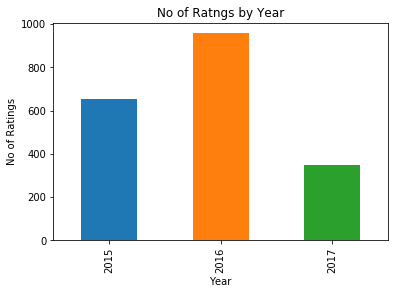

In [52]:
master_data.groupby('year')['tweet_id'].count().plot.bar()
plt.title('No of Ratngs by Year')
plt.xlabel('Year')
plt.ylabel('No of Ratings')

Text(0,0.5,'No of Dogs')

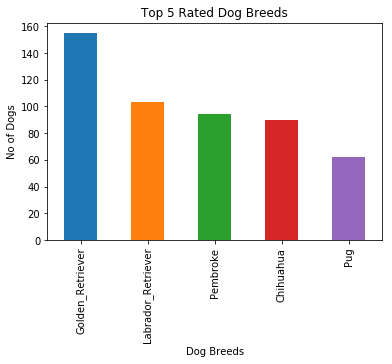

In [53]:
master_data[master_data.dog_breed != 'None'].groupby(['dog_breed'])['dog_breed'].count().sort_values(ascending=False).head(5).plot.bar()
plt.title('Top 5 Rated Dog Breeds')
plt.xlabel('Dog Breeds')
plt.ylabel('No of Dogs')

Text(0,0.5,'No of Dogs')

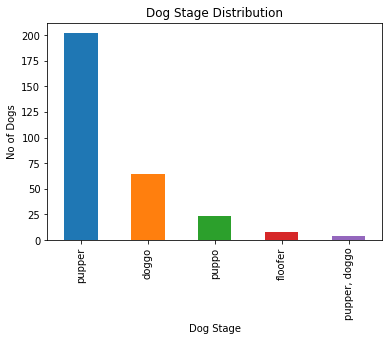

In [54]:
master_data[master_data.dog_stage != 'None'].groupby('dog_stage')['dog_stage'].count().sort_values(ascending=False).plot.bar()
plt.title('Dog Stage Distribution')
plt.xlabel('Dog Stage')
plt.ylabel('No of Dogs')